In [142]:
!pip install torch
!pip install matplotlib
!pip install torchvision
!pip install cv

You should consider upgrading via the 'c:\users\adam\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\adam\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\adam\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\adam\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [143]:
import cv2
import os
import glob
import matplotlib.pyplot as plt
import torch
import numpy as np
import torchvision 
import torchvision.transforms as T 
from PIL import Image
import random
import cv
img_dir = "C:/Users/Adam/Downloads/UF_Spring_2022/Deep_Learning/Proj2/face_images/"
torch.set_default_tensor_type('torch.FloatTensor')

In [96]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [97]:
data = load_images_from_folder(img_dir)

In [98]:
print(data[0].shape) #each images is 128 by 128 pixels and in rgb thus the 3 for color values
print(len(data)) #number of images in dataset
print(type(data))
print(data.dtype)
print(type(data[0]))

(128, 128, 3)
750
<class 'list'>
<class 'numpy.ndarray'>


In [100]:
data = np.asarray(data)
print(data.shape)

(750, 128, 128, 3)


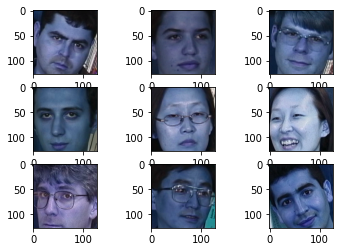

In [101]:
for i in range(0,9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(data[i][:,:,:])

Now we will convert how the images are stored and augment them to get more data 

In [102]:
data = torch.from_numpy(data) #converts numpy matrix to tensor
data = torch.movedim(data, 3, 1) #moves the rgb to the second index
data = data[torch.randperm(data.size()[0])]#randomly shuffles tensor along first dim 

In [103]:
print(data.shape)
print(type(data))

torch.Size([750, 3, 128, 128])
<class 'torch.Tensor'>


In [104]:
#helper function to print pytorch tensor 
#input is a single tensor
def print_tensor_to_numpy(tensor):
    tensor_reshape = torch.movedim(tensor, 0, 2)
    npimg = tensor_reshape.numpy()
    plt.imshow(npimg[:, :, :])   

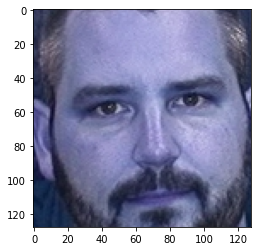

In [105]:
print_tensor_to_numpy(data[5, :,:,:])

Augment Dataset

In [106]:
print(data.shape)
print(type(data))

torch.Size([750, 3, 128, 128])
<class 'torch.Tensor'>


In [13]:
#flips the image, takes a single image and shows result if show is set to True
def flip_img(tensor, show =False):
    flipped_img = torch.flip(tensor, (2,))
    if show == True:
        print_tensor_to_numpy(flipped_img)
    return flipped_img

tensor([[[ 33,  28,  24,  ...,  16,  12,  13],
         [ 25,  20,  18,  ...,  15,  14,  15],
         [ 24,  19,  16,  ...,  17,  15,  18],
         ...,
         [ 23,  24,  24,  ...,  32,  29,  32],
         [ 24,  25,  23,  ...,  32,  34,  37],
         [ 31,  25,  22,  ...,  31,  35,  35]],

        [[ 30,  26,  23,  ...,  16,  15,  16],
         [ 22,  18,  17,  ...,  15,  17,  18],
         [ 21,  17,  18,  ...,  17,  18,  20],
         ...,
         [ 51,  51,  50,  ...,  58,  57,  60],
         [ 51,  52,  49,  ...,  60,  62,  65],
         [ 58,  52,  48,  ...,  59,  63,  63]],

        [[ 39,  32,  27,  ...,  22,  23,  24],
         [ 31,  24,  21,  ...,  21,  25,  26],
         [ 30,  23,  19,  ...,  23,  26,  30],
         ...,
         [ 86,  88,  87,  ...,  95,  92,  95],
         [ 88,  89,  86,  ...,  95,  97, 100],
         [ 95,  89,  85,  ...,  94,  98,  98]]], dtype=torch.uint8)

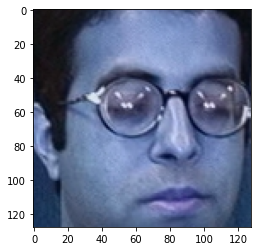

In [14]:
flip_img(data[5, :, :, :], True)

In [15]:
#crops image takes a single image tensor and crops it, shows image if show is set to true
def crop_img(tensor, show = False):
    crop = T.RandomCrop((96,96)) # transform for square crop
    resize_crop = T.Resize((128,128)) #resizes image back to original dimension
    cropped_img = resize_crop(crop(tensor)) 
    if show == True:
        print_tensor_to_numpy(cropped_img)
    return cropped_img

tensor([[[ 61,  64,  69,  ...,  69,  66,  61],
         [ 63,  66,  69,  ...,  68,  65,  62],
         [ 64,  67,  70,  ...,  68,  65,  61],
         ...,
         [ 25,  24,  27,  ...,  67,  67,  67],
         [ 24,  22,  24,  ...,  66,  65,  65],
         [ 25,  21,  22,  ...,  64,  63,  63]],

        [[ 65,  71,  78,  ...,  83,  79,  73],
         [ 67,  72,  78,  ...,  82,  78,  74],
         [ 68,  73,  79,  ...,  82,  77,  73],
         ...,
         [ 50,  47,  50,  ...,  80,  80,  79],
         [ 49,  46,  47,  ...,  79,  78,  76],
         [ 50,  45,  45,  ...,  77,  75,  74]],

        [[ 89,  98, 108,  ..., 110, 104,  97],
         [ 91,  99, 109,  ..., 109, 103,  98],
         [ 92, 100, 109,  ..., 109, 102,  97],
         ...,
         [ 84,  80,  82,  ..., 106, 106, 106],
         [ 83,  78,  79,  ..., 105, 104, 104],
         [ 84,  78,  77,  ..., 103, 102, 102]]], dtype=torch.uint8)

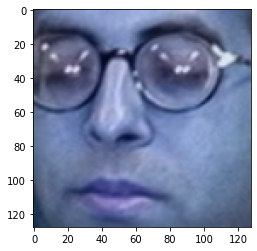

In [16]:
crop_img(data[5, :, :, :], True)

In [17]:
def tint_img(tensor, show = False):
    tint_val = 0.1*random.randrange(6, 10)
    tensor[0, :, :] = tint_val*tensor[0, :, :]
    tensor[1, :, :] = tint_val*tensor[1, :, :]
    tensor[2, :, :] = tint_val*tensor[2, :, :]
    tinted_img = tensor[:, :, :]
    if show == True:
        print_tensor_to_numpy(tinted_img)
    return tinted_img

torch.Size([3, 128, 128])
<class 'torch.Tensor'>


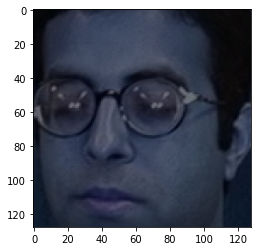

In [39]:
tinted_image = tint_img(data[5, :, :,:], True)
print(tinted_image.shape)
print(type(tinted_image))

In [61]:
########################

#its not really specified how the new data should be made for example should we flip all of the images, 750+750
#and then crop the original images 3 times an image to make another 3*750 images
#and then tint the original images 0.6-1 thus producing 4*750
#or if we should just apply some random combination of all of the transforms and use that to create the new images


######################
#weird combination of all the transforms
def create_new_img(tensor, show = False):
    chance = random.randrange(0, 10)
    #60% chance of only one transformation
    if (chance < 2):
        new_img = flip_img(tensor) 
    elif (chance >= 2 and chance <4):
        new_img = crop_img(tensor)
    elif (chance >= 4 and chance <6):
        new_img = tint_img(tensor)
    #40% chance of more complex transformations
    elif (chance >= 6 and chance <8):
        tensor_cropped = crop_img(tensor)
        tensor_tinted = tint_img(tensor_cropped)
        new_img = tensor_tinted
    elif (chance >= 8 and chance <=10):
        tensor_flipped = flip_img(tensor) 
        tensor_cropped = crop_img(tensor_flipped)
        tensor_tinted = tint_img(tensor_cropped)
        new_img = tensor_tinted
        
    if show == True:
        print_tensor_to_numpy(new_img)
        
    return new_img


In [107]:
data.shape

torch.Size([750, 3, 128, 128])

In [108]:
###for loop which appends the newly created images (takes a while)
for j in range(0, 1): #change this 1 to 7
    for i in range(0, 750):
        new_img = create_new_img(data[i, :, :, :])
        new_img = new_img[None, :, :, :] #extending the dimensions so that vector can be appended
        data = torch.cat((data, new_img), 0)

torch.Size([1499, 3, 128, 128])
<class 'torch.Tensor'>


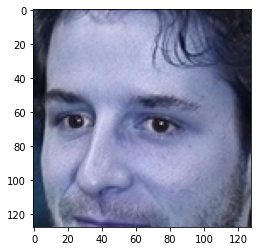

In [110]:
print(data.shape)
print(type(data))
print_tensor_to_numpy(data[1350, :,:,:])

Notes for Sahaj if he works on this on 3/2/2022
At this point we are done with augemnting the data set and the main takeaway is that now we have a dataset of dimensions:
[7500, 3, 128, 128] where 7500 is number of images 3 is the color channels and 128 by 128 pixels is the size of each image.

opencv uses numpy arrays as inputs so the cvtColor might be expecting an nparray so I would test it out with a pytorch tensor and see if it wokrs and if not than what I would do is just do a for loop that converts the tensors to nparrays using np.asarray(data), run the cvtColor function and then convert back to a tensor with torch.from_numpy(data) Note: you might have to change the order of the RGB values once you are in numpy form but that can be done with an elemen swap, at least she seemed to be hinting at that

Hopefully after all this data manip stuff we get to make the networks in a few lines of code (we could basically just look up network architectures that were used for problems like these, plus she also kind of just tells us how she wants it)

https://stackoverflow.com/questions/7587490/converting-numpy-array-to-opencv-array

#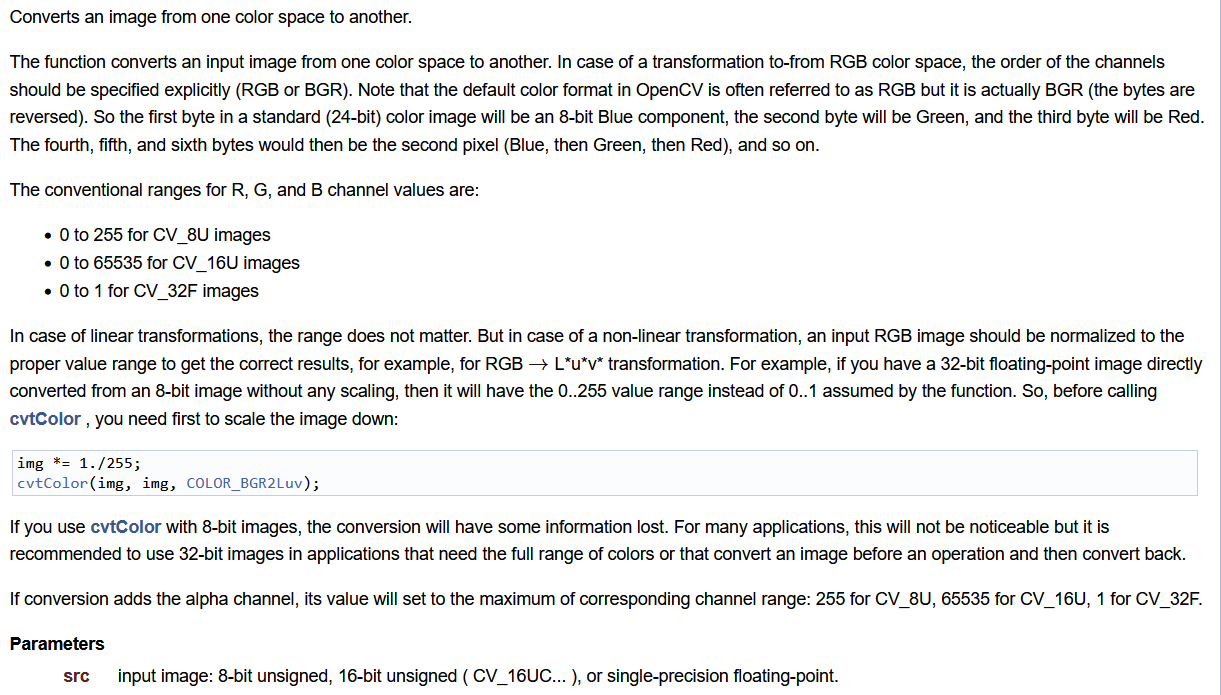

In [146]:
image = np.asarray(data[1350, :,:,:])
print(image.shape)
print(image.dtype)
image = cv.fromarray(image)
imageLAB = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

(3, 128, 128)
uint8


AttributeError: module 'cv' has no attribute 'fromarray'